<a href="https://colab.research.google.com/github/kunyoungkim/LICENSE/blob/main/%EB%A7%89%EB%8C%80_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Matplotlib

In [1]:
import pandas as pd
import numpy as np

# 데이터 프레임 생성
# 데이터 생성
data = {
    'Labels': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [3, 2, 7, 6, 9, 4, 5, 8],
    'Group': ['Group 1', 'Group 2', 'Group 1', 'Group 2', 'Group 1', 'Group 2', 'Group 1', 'Group 2']
}

df = pd.DataFrame(data)

### 1) 기본 그래프

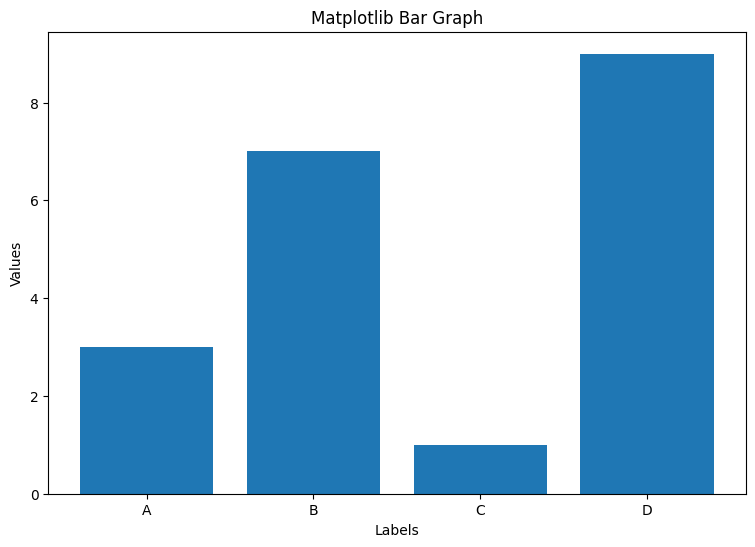

In [2]:
import matplotlib.pyplot as plt

# 데이터
labels = ['A', 'B', 'C', 'D']
values = [3, 7, 1, 9]

plt.figure(figsize=(9,6))
# 그래프 그리기
plt.bar(labels, values)

# 제목과 레이블 추가
plt.title('Matplotlib Bar Graph')
plt.xlabel('Labels')
plt.ylabel('Values')

# 그래프 보이기
plt.show()

### 2) 수평 막대 그래프 그리기

<BarContainer object of 4 artists>

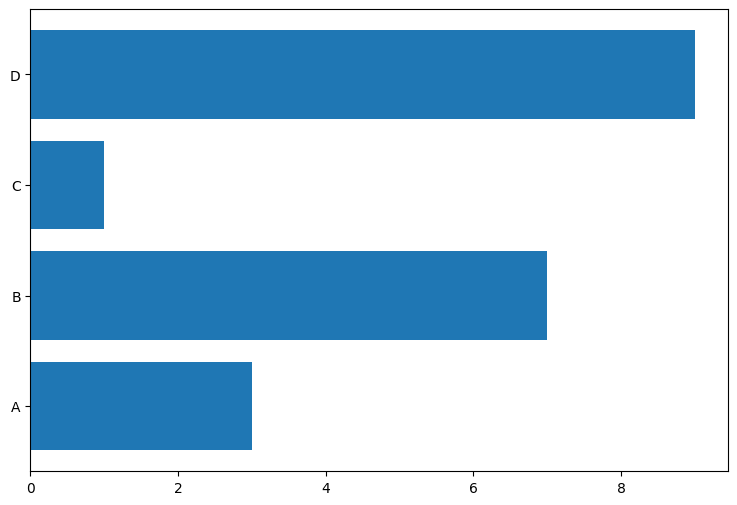

In [25]:
plt.figure(figsize=(9,6))
plt.barh(labels, values)

### 2) 그룹별 그래프

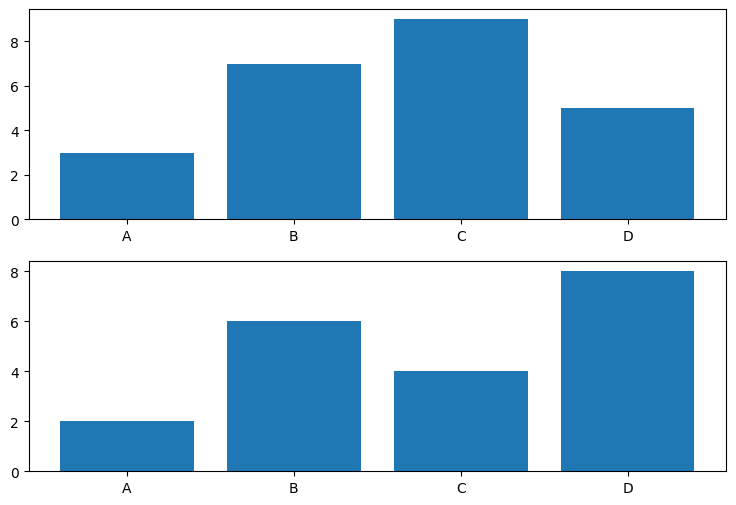

In [3]:
# plt.figure(figsize=(9,6))
count = 1
plt.figure(figsize=(9,6))
for i in df['Group'].unique():
  df_group = df[df['Group'] == i]
  plt.subplot(2,1,count)
  plt.bar(df_group['Labels'], df_group['Values'])
  count += 1
plt.show()

### 3) 그룹별 그래프 hue 설정

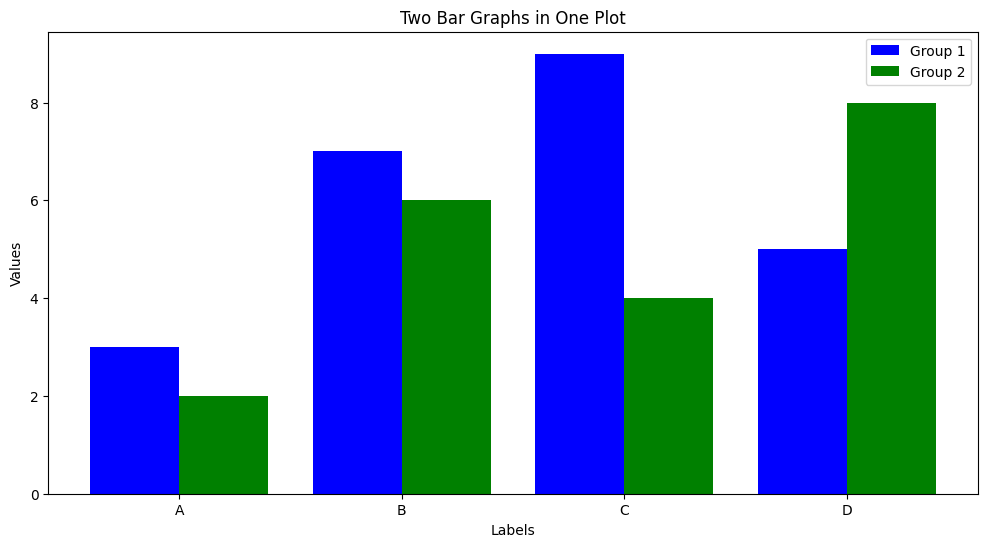

In [4]:
# Correctly setting the 'value1' and 'value2'
value1 = df[df['Group'] == 'Group 1']['Values'].values
value2 = df[df['Group'] == 'Group 2']['Values'].values

# Unique labels
labels = df['Labels'].unique()

# X coordinates
x = np.arange(len(labels))

# Create the plot
plt.figure(figsize=(12, 6))

# Draw the bars for Group 1 and Group 2
plt.bar(x - 0.2, value1, width=0.4, color='blue', label='Group 1')
plt.bar(x + 0.2, value2, width=0.4, color='green', label='Group 2')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Two Bar Graphs in One Plot')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Show the plot
plt.show()

In [5]:
# 집계함수 사용 불가능, 형태만 변경
df_pivot = df.pivot(columns='Group', index='Labels', values='Values')

In [6]:
df_pivot

Group,Group 1,Group 2
Labels,,
A,3,2
B,7,6
C,9,4
D,5,8


<Axes: ylabel='Labels'>

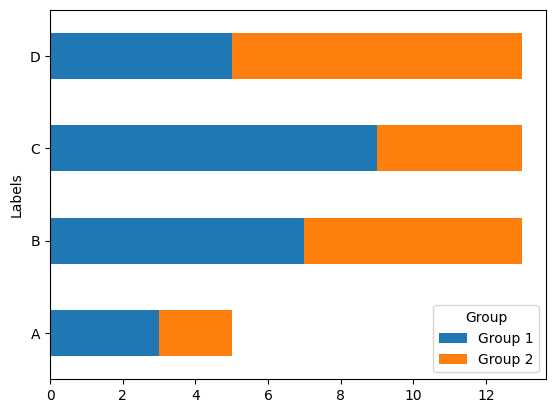

In [22]:
df_pivot.plot(kind='barh', stacked=True)

<Axes: xlabel='Labels'>

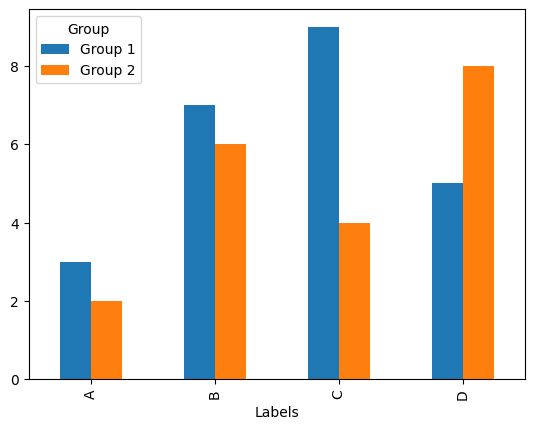

In [8]:
df_pivot.plot(kind='bar')

### 4) error bar 그리기

<ipython-input-9-4b8af2c8da6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Labels').mean()
<ipython-input-9-4b8af2c8da6c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_std = df.groupby('Labels').std()


<BarContainer object of 4 artists>

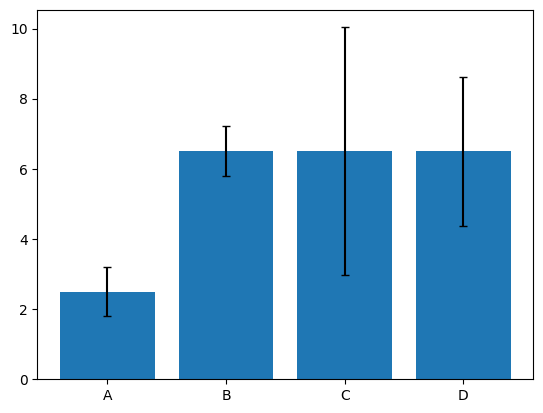

In [9]:
df_mean = df.groupby('Labels').mean()
df_std = df.groupby('Labels').std()

plt.bar(df_mean.index, df_mean['Values'], yerr=df_std['Values'], capsize=3)

### 5) 누적바 그리기

In [10]:
# 집계함수 사용 가능
df_group = df.groupby(['Labels','Group'])['Values'].mean().unstack('Group')

In [11]:
df_group

Group,Group 1,Group 2
Labels,,
A,3.0,2.0
B,7.0,6.0
C,9.0,4.0
D,5.0,8.0


<BarContainer object of 4 artists>

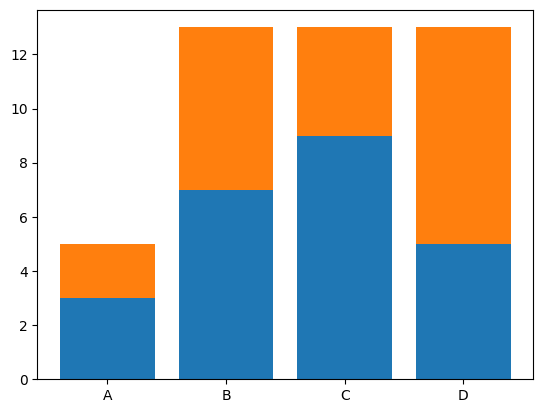

In [12]:
fig, ax = plt.subplots()

ax.bar(df_group.index, df_group['Group 1'])
ax.bar(df_group.index, df_group['Group 2'], bottom=df_group['Group 1'])

<Axes: xlabel='Labels'>

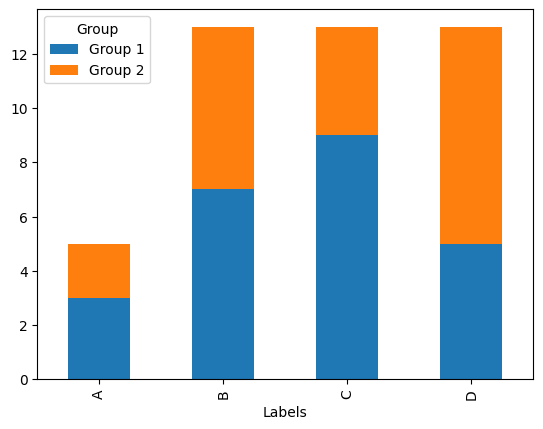

In [13]:
df_group.plot(kind='bar', stacked=True)

In [14]:
df_group.index

Index(['A', 'B', 'C', 'D'], dtype='object', name='Labels')

In [15]:
# Create a true copy of df_group to keep it unchanged
df_group_total = df_group.copy()

# Add the 'Total' column
df_group_total['Total'] = df_group_total.sum(axis=1)

# Check if the original df_group remains unchanged and the new df_group_total has the 'Total' column
df_group, df_group_total

(Group   Group 1  Group 2
 Labels                  
 A           3.0      2.0
 B           7.0      6.0
 C           9.0      4.0
 D           5.0      8.0,
 Group   Group 1  Group 2  Total
 Labels                         
 A           3.0      2.0    5.0
 B           7.0      6.0   13.0
 C           9.0      4.0   13.0
 D           5.0      8.0   13.0)

In [16]:
# # Normalize each group to sum up to 100%
# for col in ['Group 1', 'Group 2']:
#     df_group[col] = df_group[col] / df_group['Total'] * 100

# # Initialize the bottom values
# bottom_values = np.zeros(len(df_group.index))

# # Create the 100% stacked bar chart
# plt.figure(figsize=(10, 6))

# for col in ['Group 1', 'Group 2']:
#     plt.bar(df_group.index, df_group[col], bottom=bottom_values, label=col)
#     bottom_values += df_group[col].values

In [17]:
df_group_total

Group,Group 1,Group 2,Total
Labels,,,
A,3.0,2.0,5.0
B,7.0,6.0,13.0
C,9.0,4.0,13.0
D,5.0,8.0,13.0


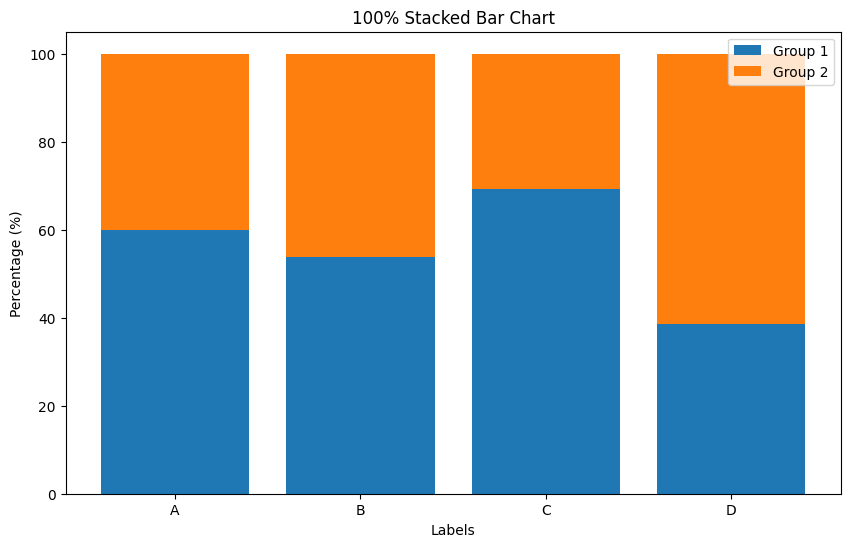

Group,Group 1,Group 2,Total
Labels,,,
A,60.000000,40.000000,5.0
B,53.846154,46.153846,13.0
C,69.230769,30.769231,13.0
D,38.461538,61.538462,13.0


In [18]:
# Normalize each group to sum up to 100%
df_group_total_all = df_group_total
for col in ['Group 1', 'Group 2']:
    # Normalize each group to sum up to 100%
    df_group_total_all[col] = df_group_total[col] / df_group_total['Total'] * 100

# Initialize the bottom values
bottom_values = np.zeros(len(df_group_total_all.index))

# Create the 100% stacked bar chart
plt.figure(figsize=(10, 6))

for col in ['Group 1', 'Group 2']:
    plt.bar(df_group_total_all.index, df_group_total_all[col], bottom=bottom_values, label=col)
    bottom_values += df_group_total_all[col].values

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()

# Show the plot
plt.show()

df_group_total

In [19]:
df_group

Group,Group 1,Group 2
Labels,,
A,3.0,2.0
B,7.0,6.0
C,9.0,4.0
D,5.0,8.0


In [20]:
bottom_values

array([100., 100., 100., 100.])